# Introduction
This project is to showcase me using the CRISP-DM(Cross-Industry Process for Data Mining)), which is a methodolgy that provides structure when planning for a data mining project, standard on the 2018 Stack Overflow Developers Survey 

CRISP-DM consists of 6 steps.

1. Business understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation
6. Deployment


# Business understanding

For my analysis, I would like to take a further dive into the Stack Overflow Developers Survey dataset and understand the answers that my fellow Latinx/Black community gave in the survey

Questions that I would like to answer:

~~How many U.S. Latinx/Black participated in the Survey~~ ?

~~What was the increase of U.S. Latinx/Black from 2017 to 2018~~ ?

~~Which countries were in the top 5 with the most amount of Latinx participates from 2017-2018~~? 

~~Which countries were in the top 5 with the most amount of Black/of African descent  participates 2017-2018~~ ? 

~~How much did the salary increase from 2017 - 2018~~ ?

~~What was the percentage increase of participates with bachelors', master's and postdoctoral degrees from latinx/black ethnicity~~ ?


In [325]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [326]:
survey_data2018 = pd.read_csv('survey_results_public2018.csv')
survey_data2017 = pd.read_csv('survey_results_public2017.csv')
column_of_interest2018 = ['Country','RaceEthnicity','FormalEducation', 'ConvertedSalary']
column_of_interest2017 = ['Country','Race','FormalEducation', 'Salary']

/Users/darrylbalderas/projects/stack-overflow/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [327]:
def clean_multi_answers(df, index_name, column_name):
    answer_df = total_count(df, index_name, column_name)
    answer_df.set_index(index_name, inplace=True)
    return answer_df

def total_count(df, index_name, column_name):
    new_df = df[column_name].value_counts().reset_index()
    new_df.rename(columns={'index': index_name, column_name: 'count'}, inplace=True)
    counts = defaultdict(int)
    for answer in parse_multi_answer(df, column_name):
        for idx in range(new_df.shape[0]):
            developer_answers = [entry.strip() for entry in new_df[index_name][idx].split(";")]
            if answer in developer_answers:
                counts[answer] += int(new_df['count'][idx])
    counts = pd.DataFrame(pd.Series(counts)).reset_index()
    counts.columns = [index_name, 'count']
    counts.sort_values('count', ascending=False, inplace=True)
    return counts

def parse_multi_answer(df, column):
    answers = set()
    for idx in df[df[column].notnull()].index:
        for entry in df[column].iloc[idx].split(';'):
            answers.add(entry.strip())
    return answers
    
def plot_race_distribution(df, title, color='red'):
    f, ax = plt.subplots(figsize=(10,8))
    races = list(df.index)[::-1]
    counts = df['count'].values[::-1]/df.sum().values
    ax.barh(races, counts, 0.35, color=color)
    ax.set_title(title)
    ax.set_ylabel('Race')
    ax.set_xlabel('Percentage')
    plt.show()
    

In [328]:
def get_indexes_latinx_and_black(df, column):
    indexes = []
    for idx in range(df.shape[0]):
        try:
            developer_races = [race_entry.strip() for race_entry in df[column][idx].split(";")]
            if 'Hispanic or Latino/Latina' in developer_races or 'Black or of African descent' in developer_races:
                indexes.append(idx)
        except:
            continue
    return indexes

def get_indexes_latinx(df, column):
    indexes = []
    for idx in range(df.shape[0]):
        try:
            developer_races = [race_entry.strip() for race_entry in df[column][idx].split(";")]
            if 'Hispanic or Latino/Latina' in developer_races and not 'Black or of African descent' in developer_races:
                indexes.append(idx)
        except:
            continue
    return indexes

def get_indexes_black(df, column):
    indexes = []
    for idx in range(df.shape[0]):
        try:
            developer_races = [race_entry.strip() for race_entry in df[column][idx].split(";")]
            if 'Black or of African descent' in developer_races and not 'Hispanic or Latino/Latina' in developer_races:
                indexes.append(idx)
        except:
            continue
    return indexes

def get_indexes_both_latinx_and_black(df, column):
    indexes = []
    for idx in range(df.shape[0]):
        try:
            developer_races = [race_entry.strip() for race_entry in df[column][idx].split(";")]
            if 'Hispanic or Latino/Latina' in developer_races and 'Black or of African descent' in developer_races:
                indexes.append(idx)
        except:
            continue
    return indexes


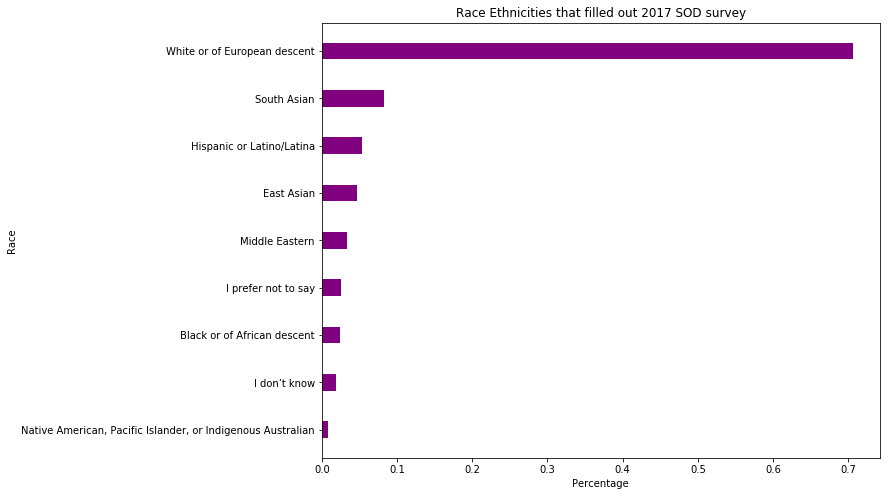

In [329]:
races_df = clean_multi_answers(survey_data2017, 'index_type', 'Race')
plot_race_distribution(races_df, title="Race Ethnicities that filled out 2017 SOD survey", color="purple")

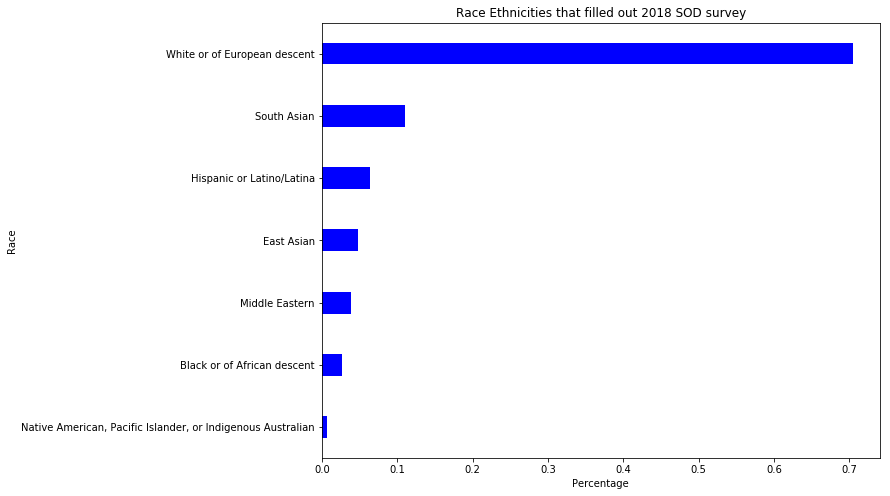

In [330]:
races_df2018 = clean_multi_answers(survey_data2018, 'index_type', 'RaceEthnicity')
plot_race_distribution(races_df2018, title="Race Ethnicities that filled out 2018 SOD survey", color="blue")

In [331]:
latinx_black2017 = races_df.index.isin(['Hispanic or Latino/Latina', 'Black or of African descent'])
total2017 = np.sum(races_df[latinx_black2017].values)
print("\n{} individuals reported as Latinx/Black participated in the Stack Overflow Developer survey".format(total2017))
print("Latinx/Black account for {0:.3f}% of the Stack Overflow 2017 survey participants".format((total2017/np.sum(races_df.values)) * 100))


2687 individuals reported as Latinx/Black participated in the Stack Overflow Developer survey
Latinx/Black account for 7.725% of the Stack Overflow 2017 survey participants


In [332]:
latinx_black2018 = races_df2018.index.isin(['Hispanic or Latino/Latina', 'Black or of African descent'])
total2018 = np.sum(races_df2018[latinx_black2018].values)
print("\n{} individuals reported as Latinx/Black participated in the Stack Overflow Developer survey".format(total2018))
print("Latinx/Black account for {0:.3f}% of the Stack Overflow 2018 survey participants".format((total2018/np.sum(races_df2018.values)) * 100))


5445 individuals reported as Latinx/Black participated in the Stack Overflow Developer survey
Latinx/Black account for 9.005% of the Stack Overflow 2018 survey participants


In [333]:
total_increase = (abs(total2017 - total2018) / (total2017 + total2018)) * 100 

print("There was a {:.2f}% increase of Latinx/Black Stack Overflow survey participants from 2017 to 2018".format(total_increase))

There was a 33.92% increase of Latinx/Black Stack Overflow survey participants from 2017 to 2018


In [334]:
question2_2017 = survey_data2017[column_of_interest2017]
question2_2018 = survey_data2018[column_of_interest2018]

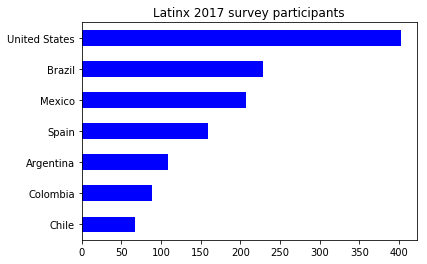

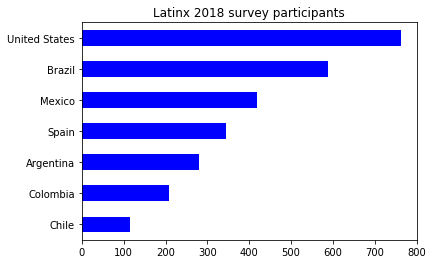

In [335]:
#Latinx survey participants
df = survey_data2017.loc[get_indexes_latinx(question2_2017, "Race"),:].reset_index()
df['Country'].value_counts()[:7][::-1].plot(kind="barh", 
                                             title="Latinx 2017 survey participants",
                                             color="blue")
plt.show()
df = survey_data2018.loc[get_indexes_latinx(question2_2018, "RaceEthnicity"),:].reset_index()
df['Country'].value_counts()[:7][::-1].plot(kind="barh", 
                                             title="Latinx 2018 survey participants",
                                             color="blue")

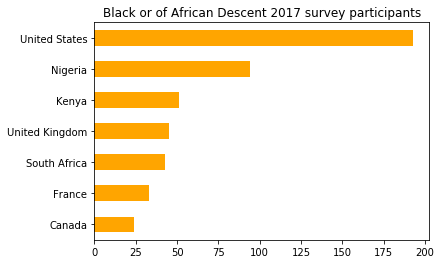

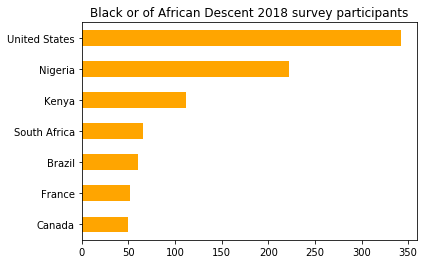

In [336]:
#Black or of African Descent survey participants
df = survey_data2017.loc[get_indexes_black(question2_2017, "Race"),:].reset_index()
df['Country'].value_counts()[:7][::-1].plot(kind="barh", 
                                             title="Black or of African Descent 2017 survey participants",
                                             color="orange")
plt.show()
df = survey_data2018.loc[get_indexes_black(question2_2018, "RaceEthnicity"),:].reset_index()
df['Country'].value_counts()[:7][::-1].plot(kind="barh", 
                                             title="Black or of African Descent 2018 survey participants",
                                             color="orange")

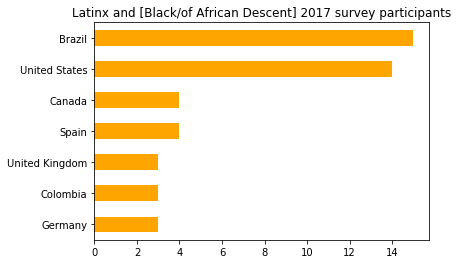

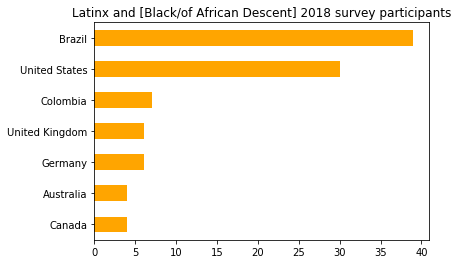

In [337]:
#Both Latinx and Black/African Descent
df = survey_data2017.loc[get_indexes_both_latinx_and_black(question2_2017, "Race"),:].reset_index()
df['Country'].value_counts()[:7][::-1].plot(kind="barh", 
                                             title="Latinx and [Black/of African Descent] 2017 survey participants",
                                             color="orange")
plt.show()
df = survey_data2018.loc[get_indexes_both_latinx_and_black(question2_2018, "RaceEthnicity"),:].reset_index()
df['Country'].value_counts()[:7][::-1].plot(kind="barh", 
                                             title="Latinx and [Black/of African Descent] 2018 survey participants",
                                             color="orange")

In [338]:
question3_2018 = survey_data2018[column_of_interest2018]
question3_2017 = survey_data2017[column_of_interest2017]

In [367]:
def remove_salary_outliers(df, column):
    first_qt, third_qt = np.percentile(df[column], [25, 75])
    iqr = third_qt - first_qt
    criteria = df[column] >  (first_qt - (1.5 * iqr))
    criteria2 = df[column] < (third_qt + (1.5 * iqr))    
    return df[criteria & criteria2]

In [375]:
df = survey_data2018.loc[get_indexes_latinx_and_black(question3_2018, "RaceEthnicity"),:].reset_index()
print("2018 Salary for Latinx/Black StackOverflow Survey Participants")
df = df[df['ConvertedSalary'].notnull()]
df = remove_salary_outliers(df, 'ConvertedSalary')
print(df['ConvertedSalary'].describe())

df = survey_data2017.loc[get_indexes_latinx_and_black(question3_2017, "Race"),:].reset_index()
print("\n2017 Salary for Latinx/Black StackOverflow Survey Participants")
df = df[df['Salary'].notnull()]
df = remove_salary_outliers(df, 'Salary')
print(df['Salary'].describe())

2018 Salary for Latinx/Black StackOverflow Survey Participants
count     3355.0000
mean     45279.1714
std      39038.8424
min          0.0000
25%      14106.0000
50%      33045.0000
75%      67721.0000
max     168000.0000
Name: ConvertedSalary, dtype: float64

2017 Salary for Latinx/Black StackOverflow Survey Participants
count      807.0000
mean     45701.3388
std      37395.4095
min          1.7158
25%      15485.2855
50%      36746.4115
75%      68181.8182
max     150000.0000
Name: Salary, dtype: float64


In [376]:
question4_2018 = survey_data2018[column_of_interest2018]
question4_2017 = survey_data2017[column_of_interest2017]

In [403]:
df = survey_data2018.loc[get_indexes_latinx_and_black(question3_2018, "RaceEthnicity"),:].reset_index()
education_counts_2018 = df['FormalEducation'].value_counts()
education_counts_2018

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              2380
Some college/university study without earning a degree                                1021
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                            756
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     445
Associate degree                                                                       232
Professional degree (JD, MD, etc.)                                                     209
Other doctoral degree (Ph.D, Ed.D., etc.)                                               80
Primary/elementary school                                                               57
I never completed any formal education                                                  26
Name: FormalEducation, dtype: int64

In [401]:
df = survey_data2017.loc[get_indexes_latinx_and_black(question3_2017, "Race"),:].reset_index()
education_counts_2017 = df['FormalEducation'].value_counts()
education_counts_2017

Bachelor's degree                                                    1201
Some college/university study without earning a bachelor's degree     563
Master's degree                                                       369
Secondary school                                                      274
Professional degree                                                    76
Doctoral degree                                                        51
Primary/elementary school                                              35
I prefer not to answer                                                 32
I never completed any formal education                                 11
Name: FormalEducation, dtype: int64

In [406]:
educations = {"Master": ["Master's degree", "Master’s degree (MA, MS, M.Eng., MBA, etc.)"],
              "Bachelor": ["Bachelor’s degree (BA, BS, B.Eng., etc.)", "Bachelor's degree"],
              "Doctor": ["Other doctoral degree (Ph.D, Ed.D., etc.)", "Doctoral degree"]}
education_2017 = defaultdict(int)
for e in educations:
    for idx in education_counts_2017.index:
        if idx in educations[e]:
            education_2017[e] =  education_counts_2017[idx]

print(education_2017)

defaultdict(<class 'int'>, {'Master': 369, 'Bachelor': 1201, 'Doctor': 51})


In [407]:
education_2018 = defaultdict(int)
for e in educations:
    for idx in education_counts_2018.index:
        if idx in educations[e]:
            education_2018[e] =  education_counts_2018[idx]

print(education_2018)

defaultdict(<class 'int'>, {'Master': 756, 'Bachelor': 2380, 'Doctor': 80})


In [416]:
for e in educations:
    total = education_2018[e] + education_2017[e]
    delta = education_2018[e] - education_2017[e]
    if delta > 0:
        print("{} increase by {:.2f}% for Latinx/Black community from 2017 to 2018".format(e, (delta/total) * 100 ))
    else:
        print("{} decrease by {:.2f}% for Latinx/Black community from 2017 to 2018".format(e, (delta/total) * 100 ))

Master increase by 34.40% for Latinx/Black community from 2017 to 2018
Bachelor increase by 32.92% for Latinx/Black community from 2017 to 2018
Doctor increase by 22.14% for Latinx/Black community from 2017 to 2018
